In [93]:
import pandas as pd
import requests
import os
import json
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

# GATHERING


In [94]:
#Gathering 1: Downloading data manually.
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [95]:
#Gathering 2: downloading data programmatically using the request library.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [96]:
image_df = pd.read_csv('data/image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### SInce I was not able to create twitter account, I used the second option to collect data from api, i.e, using the provided python code. 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [97]:
#Gathering 3: Gathering data from twitter api.
api_data = []
with open('data/tweet_json.txt') as file:
    for line in file:
        data_api = json.loads(line)
        api_data.append(data_api)
        
api_df = pd.DataFrame(api_data)
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [98]:
api_df.to_csv('data/api_data.csv')

# DATA ASSESSING

#### We have two type of data assessing techniques. The first one is visual assessment and the second one is programmatic  assessment. The first kind of assessment uses the technique of assessing data visually by using different software applications, like, Google Sheet whereas, the latter one uses programmatic ways to assess data, for example, pandas library of Python.

#### Programmatic Assessement

#### use the info() function

In [99]:
twitter_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [100]:
twitter_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [10]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
twitter_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### using the sample method

In [101]:
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
952,751937170840121344,NaN,NaN,2016-07-10 00:32:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751937170...,11,10,Ruby,None,None,None,None
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,None,None,None
1645,683849932751646720,NaN,NaN,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,None,None,None,None
2005,672272411274932228,NaN,NaN,2015-12-03 04:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,None,None,None,None
2117,670421925039075328,NaN,NaN,2015-11-28 02:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herb. 12/10 https://t.co/tLRyYvCci3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,None,None,None,None


In [19]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
1470,779123168116150273,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True


In [20]:
api_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
38,Tue Jul 11 20:47:12 +0000 2017,884876753390489601,884876753390489601,This is Lola. It's her first time outside. Mus...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 884876742820859904, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28514,False,False,False,False,en,NaN,NaN,NaN,NaN
471,Wed Jan 04 01:05:59 +0000 2017,816450570814898180,816450570814898180,Meet Moose. He doesn't want his friend to go b...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 816450564926164996, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33961,True,False,False,False,en,NaN,NaN,NaN,NaN
2283,Thu Nov 19 03:52:34 +0000 2015,667188689915760640,667188689915760640,Quite an advanced dog here. Impressively dress...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667188686895861760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,784,False,False,False,False,en,NaN,NaN,NaN,NaN
1230,Fri Mar 25 01:29:21 +0000 2016,713175907180089344,713175907180089344,Say hello to Opie and Clarkus. Clarkus fell as...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 713175901853319168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4851,False,False,False,False,en,NaN,NaN,NaN,NaN
1751,Mon Dec 21 04:52:53 +0000 2015,678800283649069056,678800283649069056,Here's a pupper with some mean tan lines. Snaz...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678800275839311872, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2810,False,False,False,False,en,NaN,NaN,NaN,NaN


In [21]:
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [102]:
twitter_df.duplicated().sum()

0

In [103]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [104]:
image_df.duplicated().sum()

0

In [105]:
api_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

## Quality Issues

### On Twitter Archive data
#### 1. doggo, floofer, pupper and puppo has none value for missing values
#### 2. Name column has missing and invalid values referred as "none".
#### 3. Validity issue with dog names(example, a dog named as "a")
#### 4  Replace html links with actual source
#### 5 Keep original tweets only

### On Image Prediction data
#### 6. The number of digits on p1_conf, p2_conf and p3_conf columns is inconsistant.

### On API data 
#### 7. id column has different name than the twitter archive and image prediciton dataset.
#### 8. created_at datatype in api_clean dataset should be changed to datetime
#### 9. Drop duplicate column.(id and id_str contain the same data)

## TIDENESS ISSUES

### On Twitter Archive Data
#### 1. the four dog stages should be collected together as one column.

### On API data 
#### 1. Remove unnecessary columns from api dataset

#### All tables should be combined together to give one observational unit


## CLEANING PROCESS

### Before we start any cleaning step, we first need to copy our datasets by using copy method of pandas library to proceed on cleaning.

In [121]:
twitter_clean = twitter_df.copy()
image_clean = image_df.copy()
api_clean = api_df.copy()

### Quality Issue #1: doggo, floofer, pupper and puppo has none value for missing values


### Define

####  - Replace none value on doggo,floofer,pupper,puppo columns to numpy nan

### Code

In [122]:
# handle none values
twitter_clean.doggo.replace('None', '', inplace=True)
twitter_clean.floofer.replace('None', '', inplace=True)
twitter_clean.pupper.replace('None', '', inplace=True)
twitter_clean.puppo.replace('None', '', inplace=True)

### Test

In [123]:
twitter_clean.doggo.unique()

array(['', 'doggo'], dtype=object)

In [124]:
twitter_clean.floofer.unique()

array(['', 'floofer'], dtype=object)

In [125]:
twitter_clean.pupper.unique()

array(['', 'pupper'], dtype=object)

In [126]:
twitter_clean.puppo.unique()

array(['', 'puppo'], dtype=object)

### Quality Issue #2 : Name column has missing and invalid values referred as "none"

### Define

#### -Replace "None" and invalid value with numpy nan value

### Code

In [127]:
twitter_clean.name.replace(['None'], np.nan, inplace=True)

### Test

In [128]:
twitter_clean.name.value_counts()

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 956, dtype: int64

### Quality Issue #3: Validity issue with dog names(example, a dog named as "a")


### Define

#### - Replace invalid names with nan

### Code

In [129]:
temp = twitter_clean[twitter_clean.name.str.istitle() == False]['name'].unique()
twitter_clean.name.replace(temp,np.nan, inplace=True)

### Test

In [130]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

In [131]:
twitter_clean.name.value_counts()

Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 926, dtype: int64

### Quality Issue #4: Replace html links with actual source

### Define

####  - replace html links with actual source

### Code

In [132]:
twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [133]:
twitter_clean.source=twitter_clean.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'], 'Twitter for Iphone')
twitter_clean.source=twitter_clean.source.replace(['<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'], 'Vine- Make a Scene')
twitter_clean.source=twitter_clean.source.replace(['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], 'TweetDeck')
twitter_clean.source=twitter_clean.source.replace(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'], 'Twitter Web Client')

### Test

In [134]:
twitter_clean.source.value_counts()

Twitter for Iphone    2221
Vine- Make a Scene      91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Quality Issue #5: Keep original ratings (no retweets) 

### Define

####  - Filter retweets and remove it.

### Code

In [135]:
twitter_clean.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [151]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(twitter_clean['retweeted_status_id'].notnull().sum())
tweets_copy = twitter_clean[twitter_clean['retweeted_status_id'].isna()]
# Below checks the retweets have been effectively removed.
tweets_copy['retweeted_status_id'].notnull().sum()

0


0

In [148]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(twitter_clean['retweeted_status_user_id'].notnull().sum())
tweets_copy = twitter_clean[twitter_clean['retweeted_status_user_id'].isna()]
# Below checks the retweets have been effectively removed.
tweets_copy['retweeted_status_user_id'].notnull().sum()

0


0

In [149]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(twitter_clean['retweeted_status_timestamp'].notnull().sum())
tweets_copy = twitter_clean[twitter_clean['retweeted_status_timestamp'].isna()]
# Below checks the retweets have been effectively removed.
tweets_copy['retweeted_status_timestamp'].notnull().sum()

0


0

### Test

In [152]:
print(sum(twitter_clean.retweeted_status_id.value_counts()))

0


In [153]:
print(sum(twitter_clean.retweeted_status_user_id.value_counts()))

0


In [154]:
print(sum(twitter_clean.retweeted_status_timestamp.value_counts()))

0


### Quality Issue #6: The number of digits on p1_conf, p2_conf and p3_conf columns is inconsistant.

### Define

#### - Round the value of p1_conf, p2_conf and p3_conf to four digits decimal place. 

### Code

In [155]:
image_clean['p1_conf'] = image_clean.p1_conf.round(4)
image_clean['p2_conf'] = image_clean.p2_conf.round(4)
image_clean['p3_conf'] = image_clean.p3_conf.round(4)

### Test

In [156]:
image_clean.p1_conf
image_clean.p2_conf
image_clean.p3_conf

0       0.0614
1       0.0720
2       0.1162
3       0.2228
4       0.1546
         ...  
2070    0.1752
2071    0.0408
2072    0.0314
2073    0.0690
2074    0.0761
Name: p3_conf, Length: 2075, dtype: float64

### Quality Issue #7 : id column on api_clean dataset has different name than the twitter archive and image prediciton dataset.

### Define

####  -Rename id with tweet_id on api_clean data

### Code

In [157]:
api_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [158]:
api_clean

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


### Quality Issue #8 : created_at datatype in api_clean dataset should be changed to datetime

### Define 

#### -Change created_at column datatype to datetime

### Code

In [159]:
api_clean['created_at'] = pd.to_datetime(api_clean['created_at'])

### Test

In [160]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issue #9: Drop duplicate column.(id and id_str contain the same data)

### Define

####  - Drop id_str column on the api data. 

### Code

In [161]:
api_clean = api_clean.drop(['id_str'], axis=1)

### Test

In [162]:
api_clean

,created_at,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


### Tidiness Issue #1: the four dog stages should be collected together as one column.

### Define

####  - Merge the four dog stages into one column

### Code

In [163]:
# merge into column
twitter_clean['dog_stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo


# handle multiple stages
twitter_clean.loc[twitter_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_clean.loc[twitter_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_clean.loc[twitter_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


# handle missing values
twitter_clean.loc[twitter_clean.dog_stage == '', 'dog_stage'] = np.nan

In [170]:
twitter_clean = twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

### Test

In [172]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [173]:
twitter_clean.dog_stage

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: dog_stage, Length: 2175, dtype: object

### Tidiness Issue #2: Drop unnecessary columns from the api dataset

### Define

####  - Copy only the necessary columns or drop the unnecessary columns

### Code

In [174]:
#Copy the necessary columns
api_clean = api_clean[['tweet_id', 'favorite_count', 'retweet_count']]

### Test

In [175]:
api_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Tidiness Issue #3: Merge all the datasets into one dataset

### Define

####  - Merge all the datasets together

### Code

In [176]:
twitter_merge = pd.merge(twitter_clean,image_clean, on =['tweet_id'], how = 'inner')
twitter_merge = pd.merge(twitter_merge,api_clean, on =['tweet_id'], how = 'inner')

### Test

In [177]:
twitter_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.0970,False,bagel,0.0859,False,banana,0.0761,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for Iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for Iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True,41048,9774


### Storing Data

In [178]:
twitter_merge.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

In [179]:
twitter_merge.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

### Analayzing and Visualizing data

In [183]:
df = pd.read_csv('twitter_archive_master.csv')

In [184]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.0970,False,bagel,0.0859,False,banana,0.0761,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for Iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for Iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True,41048,9774


In [185]:
df.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
1989  666049248165822465                    NaN                  NaN   
1990  666044226329800704                    NaN                  NaN   
1991  666033412701032449                    NaN                  NaN   
1992  666029285002620928                    NaN                  NaN   
1993  666020888022790149                    NaN                  NaN   

                      timestamp              source  \
0     2017-08-01 16:23:56 +0000  Twitter for Iph

In [186]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

## Visualization

####  Observation 1:Lets find out the most common names of dogs. 

In [213]:
df.name.value_counts()

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Penny          9
              ..
Glenn          1
Shelby         1
Sephie         1
Bonaparte      1
Christoper     1
Name: name, Length: 908, dtype: int64

Text(0, 0.5, 'Dog Names')

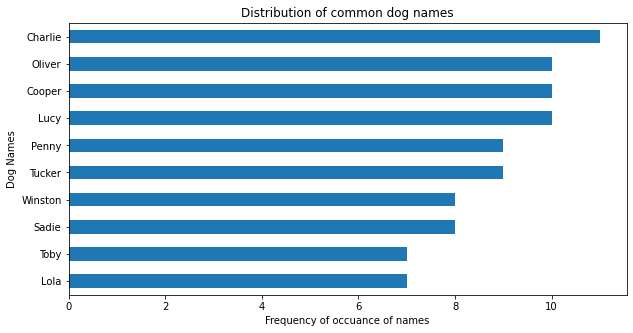

In [191]:
#visualizing the top most common 10 names from this dataset
df.name.value_counts().iloc[9::-1].plot(kind='barh',figsize=(10,5))
plt.title('Distribution of common dog names')
plt.xlabel('Frequency of occuance of names')
plt.ylabel('Dog Names')

#### Observation 2:  Lets find out the most common breed

Text(0.5, 1.0, 'Visualizing the most common breeds')

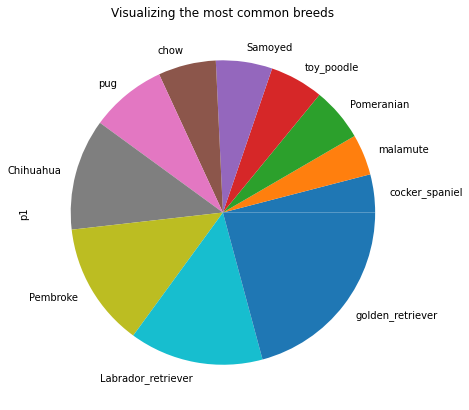

In [219]:
#visualizing the top most common 10 breeds from this dataset
df.p1.value_counts().iloc[10::-1].plot.pie(figsize=(10,7))
plt.title('Visualizing the most common breeds')

#### observation 3: Let's find out the most common ratings that is given for a tweet
##### Since the rating denominator is the same for all ratings, we will only see the rating numerator value

Text(0.5, 0, 'Dog rating Denominator value')

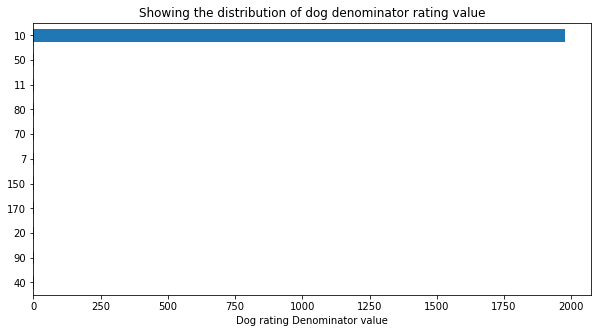

In [217]:
df.rating_denominator.value_counts().iloc[10::-1].plot(kind='barh',figsize=(10,5))
plt.title("Showing the distribution of dog denominator rating value")
plt.xlabel('Dog rating Denominator value')

Text(0.5, 0, 'Dog rating Numerator value')

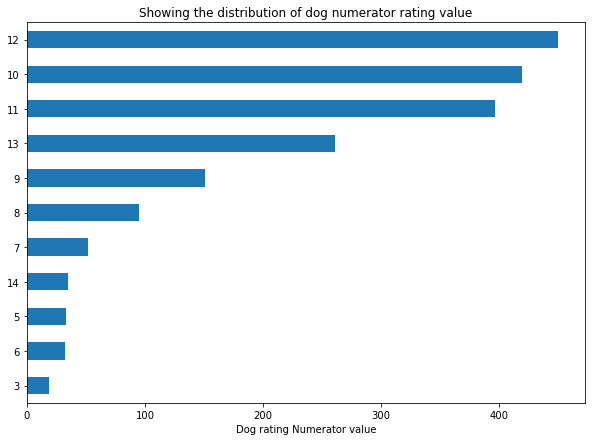

In [221]:
value = df.rating_numerator.value_counts()
df.rating_numerator.value_counts().iloc[10::-1].plot(kind="barh", figsize=(10,7))
plt.title("Showing the distribution of dog numerator rating value")
plt.xlabel('Dog rating Numerator value')